## Анализ рождаемости в России с помощью источника внешних данных
---------------------
#### Получить данные из HTML таблицы с данными по рождаемости в России

[Источник](https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html)

------------------------------------------------------

 <font size="3" color=Teal><a class="ancor" id="Содержание"></a>
    
###  Содержание:
    
- [1. Загрузка и парсинг данных](#1)
- [2. Визуализация](#2)
- [3. Вывод](#3)

------------------------------------------

#### <font color=Teal>[Загрузка и парсинг данных](#Содержание) <a class="ancor" id="1"></a> 

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import datetime
import re
import time 
import requests # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup # Импорт библиотеки для автоматического парсинга странички

In [2]:
#игнорируем ошибки 
warnings.filterwarnings("ignore")

#расщирение дисплея по максимальному размеру выводимых данных
pd.set_option('display.max_colwidth', -1)

In [3]:
#сохраняем ссылка на источник в константу
URL = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

In [4]:
req = requests.get(URL) # сохраняем объект Response в переменную req
print(req.status_code)

200


Все отлично, ошибок нет, можем парсить таблицу.

In [5]:
soup = BeautifulSoup(req.text, 'lxml') #сохраняем в переменную soup, выбераем парсер lxml 

In [6]:
table = [] # список с информацией из всей таблицы для каждого столбца
for row in soup.find_all('tr'):
    if not row.find_all('th'):
# Эта проверка необходима, чтобы пропустить первую строку таблицы с заголовками
        table.append([element.text for element in row.find_all('td')])

In [7]:
# проблема в том, что название таблицы и наблюдения содержатся в одинаковом теге 
pd.Series(table[:1])

0    [Год, Количество родившихся чел.]
dtype: object

In [8]:
# поэтому сохраняем все строчки. кроме первой с названием, название столбцов передаем с помощью метода columns
data= pd.DataFrame(table[1:])
data.columns = ['Год','Количество родившихся чел.']

In [9]:
data.info() # требуется преобразовать столбцы в целочисчленные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Год                         61 non-null     object
 1   Количество родившихся чел.  61 non-null     object
dtypes: object(2)
memory usage: 552.0+ bytes


In [10]:
# посмотрим на первые и последние строки данных, всего 61 наблюдение
display(pd.concat([data.head(5),data.tail(5)],axis=0))

,Год,Количество родившихся чел.
0,1959,2 796 228
1,1960,2 782 353
2,1961,2 662 135
3,1962,2 482 539
4,1963,2 331 505
56,2015,1 944 136
57,2016,1 893 256
58,2017,1 689 884
59,2018,1 599 316
60,2019,1 484 517


In [11]:
#переводим в числовые значения период наблюдение
data['Год'] = pd.to_numeric(data['Год'], errors='coerce')

#здесь дополнительно нужно удалить пробелы регулярным выражением и методом replace
data['Количество родившихся чел.']  = data['Количество родившихся чел.'].replace(r'\s+','',regex=True)
data['Количество родившихся чел.'] = pd.to_numeric(data['Количество родившихся чел.'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Год                         61 non-null     int64
 1   Количество родившихся чел.  61 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [13]:
data.head(5)

,Год,Количество родившихся чел.
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505


------------------------------------------

#### <font color=Teal>[Визуализация](#Содержание) <a class="ancor" id="2"></a> 

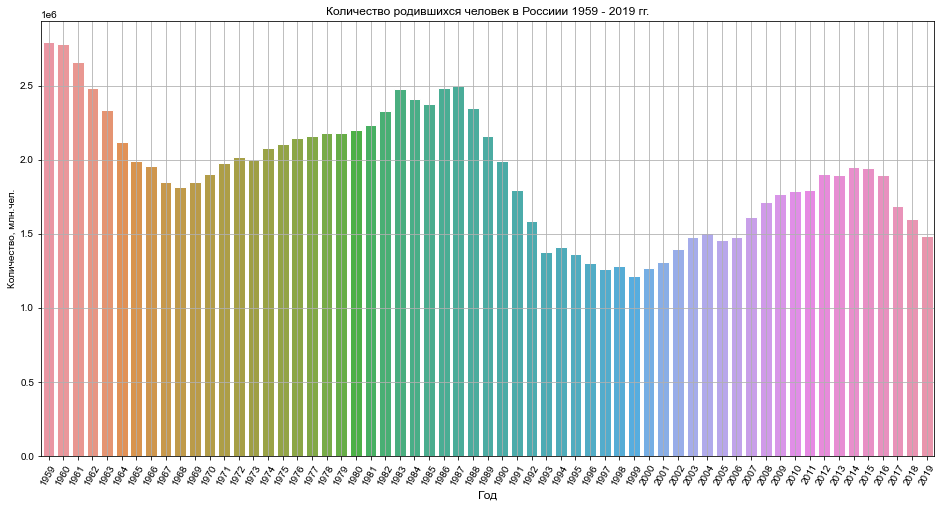

In [14]:
#используем библиотеку seaborn
fig, ax = plt.subplots(figsize=(12, 9))
sns.set_style('ticks')
sns.barplot(x='Год', y='Количество родившихся чел.', 
            data=data)

plt.xlabel('Год', fontsize = 12)
plt.ylabel('Количество, млн.чел.')
plt.title('Количество родившихся человек в Россиии 1959 - 2019 гг.')
ax.grid(True)
plt.xticks(rotation=60)
#plt.ylim(0, 100)
fig.set_figheight(8) # изменение по высоте
fig.set_figwidth(16) # изменение по ширине
plt.show();

-------------------------------------------------------

#### <font color=Teal>[Вывод](#Содержание) <a class="ancor" id="3"></a> 

`Рождаемость падает циклически, в течение 10 лет с 1959 по 1968 резкий спад, потом плавный рост до 1990, далее резкий спад, возможно связан с политическими событиями, до 1999, далее плавный рост, и в 2014 резкий спад, снова связанный с политическими событиями. При имееющихся данных ключевое влияние на рождаемость оказывает политический фактор`

In [15]:
# сохранение файла 
#data.to_csv('data.csv', sep=',')